In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyupbit
from sklearn import preprocessing

## 상장일-현재

In [2]:
ticker = 'KRW-ALGO'
interval = 'day'
to = '2021-12-19'
algo = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to))
pd.options.display.float_format = '{:.2f}'.format
algo.reset_index(inplace=True)
algo = algo.rename(columns={'index':'date'})
algo
algo.to_csv("data/최종/algo_211118_211218.csv")

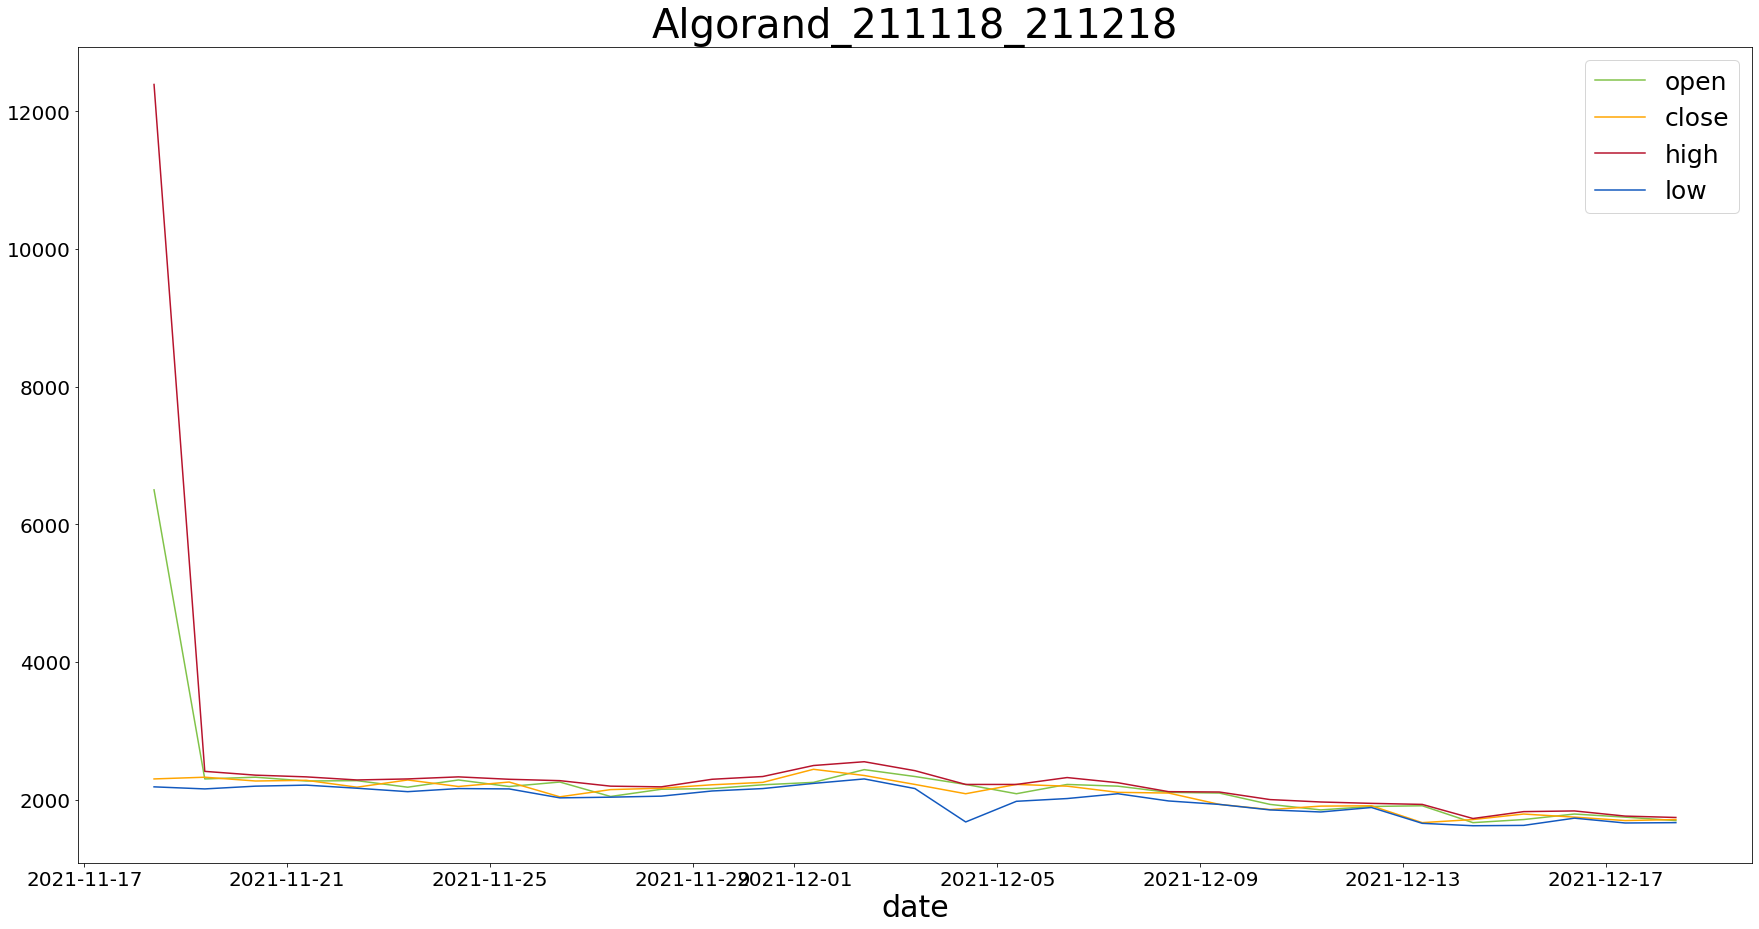

In [3]:
plt.figure(figsize=(30, 15))
plt.title("Algorand_211118_211218", fontsize=40)
plt.plot(algo.date, algo['open'], "#81C349")
plt.plot(algo.date, algo['close'], "#FFA500")
plt.plot(algo.date, algo['high'], "#B7142D")
plt.plot(algo.date, algo['low'], "#1259BF")
plt.xlabel('date', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['open', 'close', 'high', 'low'], prop={'size': 25})
plt.show()

In [4]:
algo

,date,open,high,low,close,volume,value
0,2021-11-18 09:00:00,6500.00,12390.00,2185.00,2300.00,429629293.18,1481658713780.10
1,2021-11-19 09:00:00,2300.00,2410.00,2155.00,2325.00,76227621.46,173572110263.32
2,2021-11-20 09:00:00,2325.00,2355.00,2195.00,2270.00,34691610.43,78849413287.69
3,2021-11-21 09:00:00,2270.00,2330.00,2210.00,2280.00,22844716.10,51823995691.65
4,2021-11-22 09:00:00,2275.00,2285.00,2165.00,2180.00,18026110.17,39732825971.93
5,2021-11-23 09:00:00,2180.00,2300.00,2115.00,2285.00,18599272.33,40614366751.59
6,2021-11-24 09:00:00,2285.00,2330.00,2160.00,2190.00,14656988.16,32791756358.86
7,2021-11-25 09:00:00,2190.00,2295.00,2155.00,2255.00,14839586.25,32938474887.96
8,2021-11-26 09:00:00,2255.00,2275.00,2025.00,2040.00,17584761.47,37601661875.46
9,2021-11-27 09:00:00,2045.00,2195.00,2035.00,2145.00,11007878.87,23446580083.18


In [5]:
algo = algo.astype({'open': int, 'high': int, 'low': int, 'close':int})
algo.drop(algo.columns[[5,6]], axis=1, inplace=True)
algo

,date,open,high,low,close
0,2021-11-18 09:00:00,6500,12390,2185,2300
1,2021-11-19 09:00:00,2300,2410,2155,2325
2,2021-11-20 09:00:00,2325,2355,2195,2270
3,2021-11-21 09:00:00,2270,2330,2210,2280
4,2021-11-22 09:00:00,2275,2285,2165,2180
5,2021-11-23 09:00:00,2180,2300,2115,2285
6,2021-11-24 09:00:00,2285,2330,2160,2190
7,2021-11-25 09:00:00,2190,2295,2155,2255
8,2021-11-26 09:00:00,2255,2275,2025,2040
9,2021-11-27 09:00:00,2045,2195,2035,2145


In [6]:
er_ir = pd.read_csv("data/final/er_ir.csv", index_col=0)
er_ir

,won,percent
date,,
2021-01-01,1.088.00,0.50
2021-01-02,1.088.00,0.50
2021-01-03,1.088.00,0.50
2021-01-04,1.088.00,0.50
2021-01-05,1.083.10,0.50
...,...,...
2022-01-15,1.188.20,1.25
2022-01-16,1.188.20,1.25
2022-01-17,1.187.60,1.25


In [7]:
algo_er_ir = er_ir.iloc[321:352]
algo_er_ir

,won,percent
date,,
2021-11-18,1.183.60,0.75
2021-11-19,1.180.50,0.75
2021-11-20,1.180.50,0.75
2021-11-21,1.180.50,0.75
2021-11-22,1.183.50,0.75
2021-11-23,1.187.40,0.75
2021-11-24,1.188.90,0.75
2021-11-25,1.188.50,1.00
2021-11-26,1.189.70,1.00


In [8]:
algo_er_ir.reset_index(level=0, inplace=True)
algo_er_ir

,date,won,percent
0,2021-11-18,1.183.60,0.75
1,2021-11-19,1.180.50,0.75
2,2021-11-20,1.180.50,0.75
3,2021-11-21,1.180.50,0.75
4,2021-11-22,1.183.50,0.75
5,2021-11-23,1.187.40,0.75
6,2021-11-24,1.188.90,0.75
7,2021-11-25,1.188.50,1.00
8,2021-11-26,1.189.70,1.00
9,2021-11-27,1.189.70,1.00


In [9]:
algo_er_ir.drop(algo_er_ir.columns[[0]], axis=1, inplace=True)
algo_er_ir

C:\Users\hmin0\anaconda3\envs\py38-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,won,percent
0,1.183.60,0.75
1,1.180.50,0.75
2,1.180.50,0.75
3,1.180.50,0.75
4,1.183.50,0.75
5,1.187.40,0.75
6,1.188.90,0.75
7,1.188.50,1.00
8,1.189.70,1.00
9,1.189.70,1.00


In [10]:
algo_er_ir = pd.concat([algo, algo_er_ir], axis=1)
algo_er_ir

,date,open,high,low,close,won,percent
0,2021-11-18 09:00:00,6500,12390,2185,2300,1.183.60,0.75
1,2021-11-19 09:00:00,2300,2410,2155,2325,1.180.50,0.75
2,2021-11-20 09:00:00,2325,2355,2195,2270,1.180.50,0.75
3,2021-11-21 09:00:00,2270,2330,2210,2280,1.180.50,0.75
4,2021-11-22 09:00:00,2275,2285,2165,2180,1.183.50,0.75
5,2021-11-23 09:00:00,2180,2300,2115,2285,1.187.40,0.75
6,2021-11-24 09:00:00,2285,2330,2160,2190,1.188.90,0.75
7,2021-11-25 09:00:00,2190,2295,2155,2255,1.188.50,1.00
8,2021-11-26 09:00:00,2255,2275,2025,2040,1.189.70,1.00
9,2021-11-27 09:00:00,2045,2195,2035,2145,1.189.70,1.00


In [11]:
#algo_er_ir.to_csv("data/final/algo_er_ir.csv")

## 환율

C:\Users\hmin0\AppData\Local\Temp/ipykernel_10608/1223273268.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


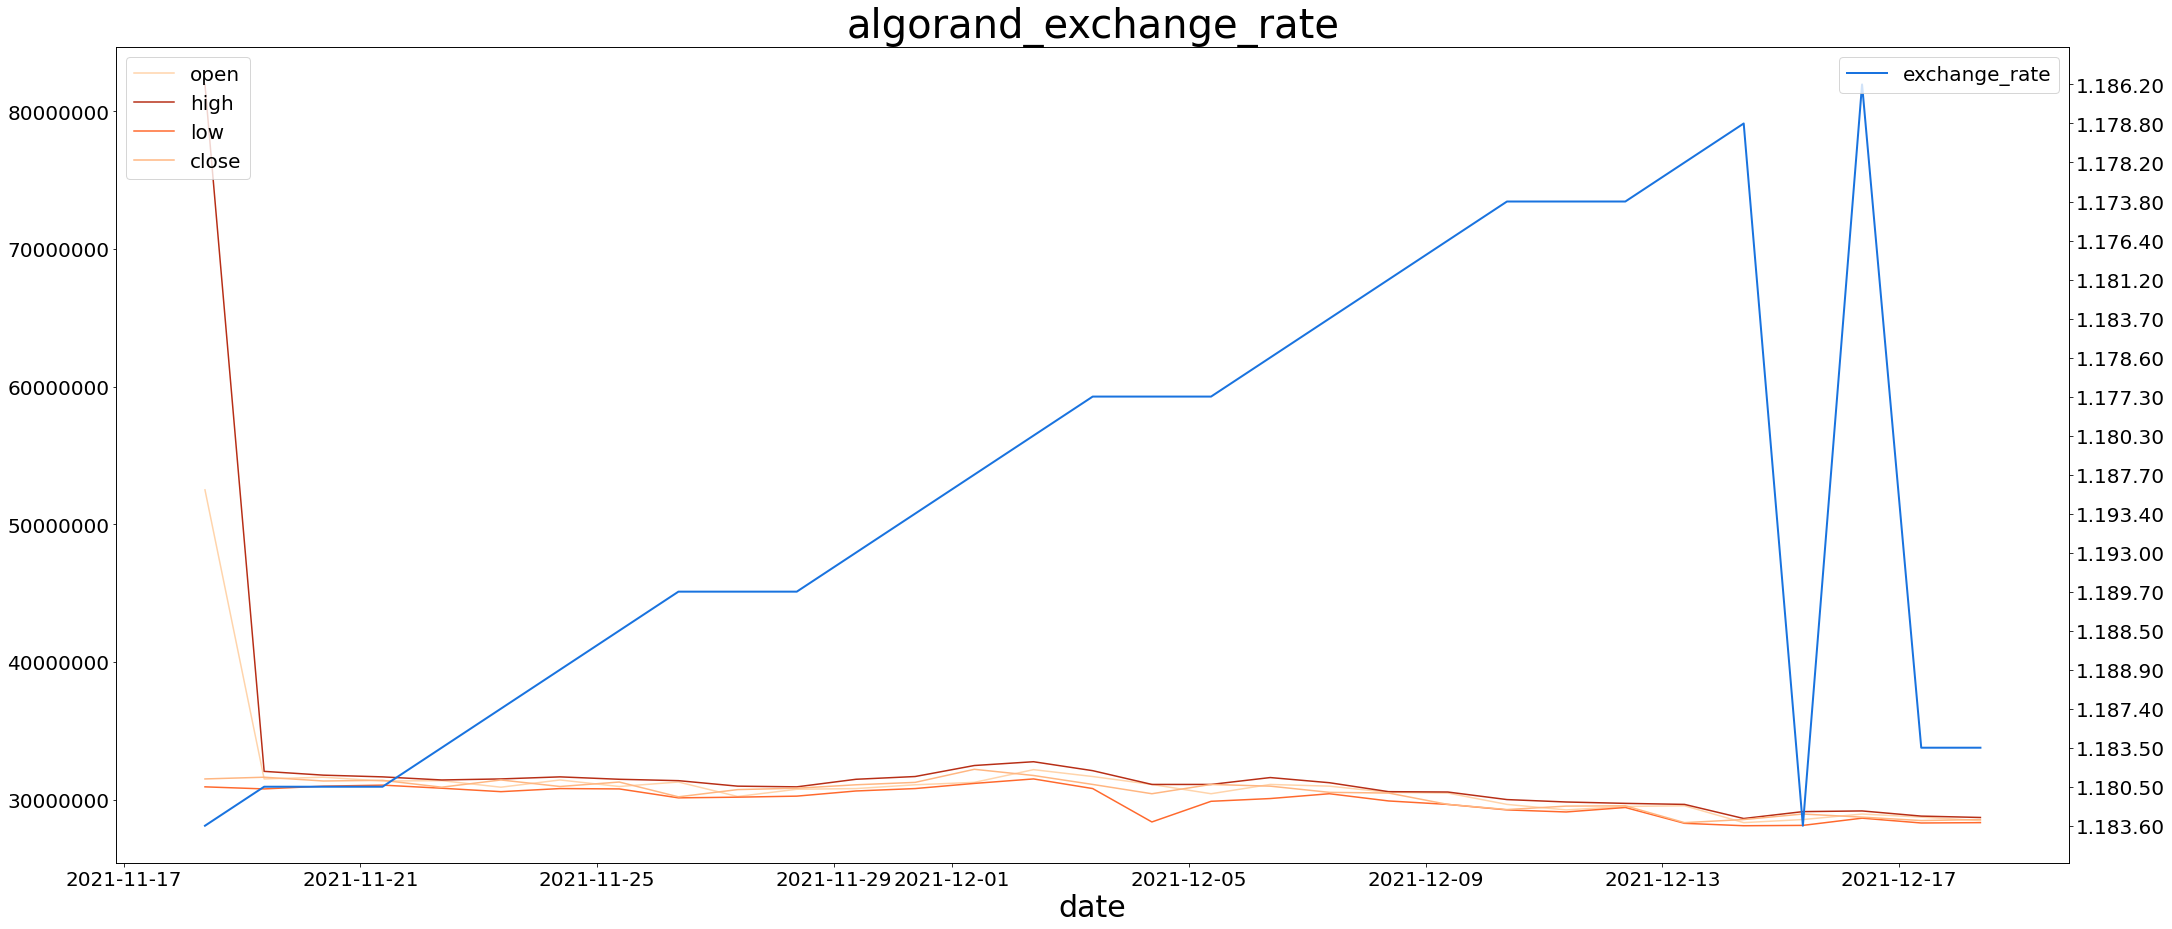

In [12]:
%matplotlib inline
x = algo_er_ir.date
y1 = algo_er_ir.open
y2 = algo_er_ir.high
y3 = algo_er_ir.low
y4 = algo_er_ir.close
y5= algo_er_ir.won

plt.rcParams['figure.figsize'] = (35, 15)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('algorand_exchange_rate', fontsize=40)


ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='exchange_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2.set_ylim([1083.10, 1199.10 ]) #수정필요
#plt.savefig('bitcoin_exchange_rate.png', facecolor='#eeeeee')
plt.show()

## 금리

C:\Users\hmin0\AppData\Local\Temp/ipykernel_10608/2672953614.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


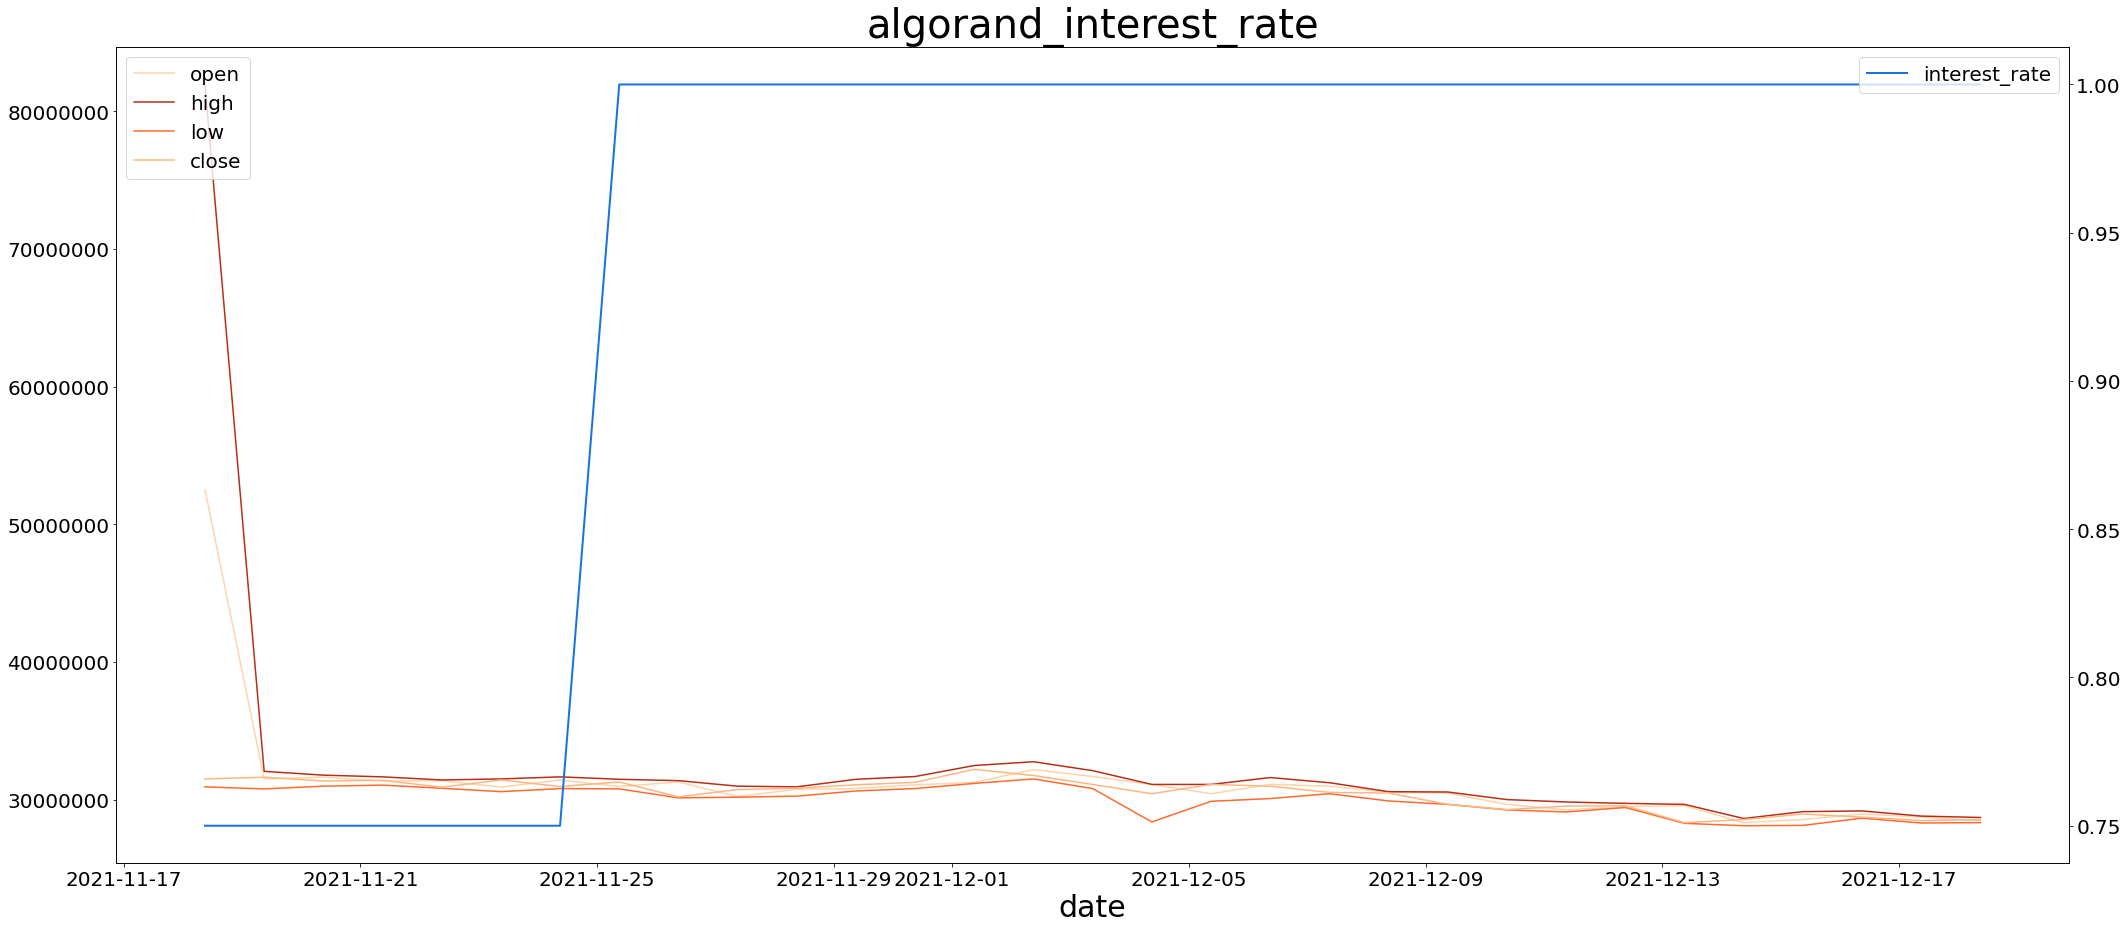

In [13]:
%matplotlib inline
x = algo_er_ir.date
y1 = algo_er_ir.open
y2 = algo_er_ir.high
y3 = algo_er_ir.low
y4 = algo_er_ir.close
y5= algo_er_ir.percent

plt.rcParams['figure.figsize'] = (35, 15)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('algorand_interest_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='interest_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2.set_ylim([1083.10, 1199.10 ]) #수정필요
#plt.savefig('bitcoin_exchange_rate.png', facecolor='#eeeeee')
plt.show()

## 한달거래량과 종가

In [14]:
algo_sample = pd.read_csv("data/최종/algo_211118_211218.csv", index_col=0)
algo_sample = algo_sample.drop(["open","high","low", "value"], axis=1)
algo_sample

,date,close,volume
0,2021-11-18 09:00:00,2300.00,429629293.18
1,2021-11-19 09:00:00,2325.00,76227621.46
2,2021-11-20 09:00:00,2270.00,34691610.43
3,2021-11-21 09:00:00,2280.00,22844716.10
4,2021-11-22 09:00:00,2180.00,18026110.17
5,2021-11-23 09:00:00,2285.00,18599272.33
6,2021-11-24 09:00:00,2190.00,14656988.16
7,2021-11-25 09:00:00,2255.00,14839586.25
8,2021-11-26 09:00:00,2040.00,17584761.47
9,2021-11-27 09:00:00,2145.00,11007878.87


In [15]:
algo_sample= algo_sample.set_index("date")

In [16]:
algo_sample.index = algo_sample.index.str.replace(" 09:00:00", "")

In [17]:
pd.options.display.float_format = '{:.2f}'.format
algo_sample

,close,volume
date,,
2021-11-18,2300.00,429629293.18
2021-11-19,2325.00,76227621.46
2021-11-20,2270.00,34691610.43
2021-11-21,2280.00,22844716.10
2021-11-22,2180.00,18026110.17
2021-11-23,2285.00,18599272.33
2021-11-24,2190.00,14656988.16
2021-11-25,2255.00,14839586.25
2021-11-26,2040.00,17584761.47


In [23]:
#algo_sample.to_csv("data/final/algo_close_volume.csv")

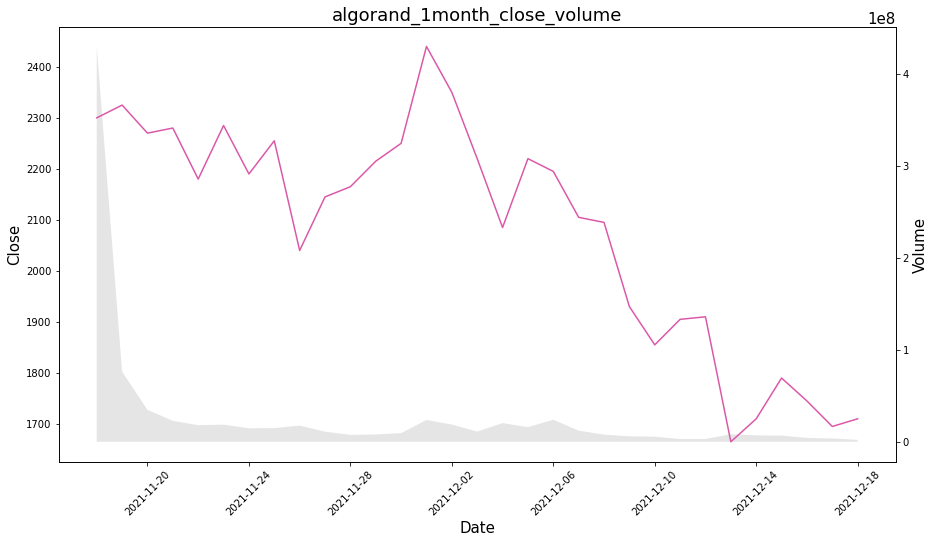

In [18]:
from matplotlib import dates

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = (15)

x = algo_sample.index
y1 = algo_sample.close
y2 = algo_sample.volume

fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(dates.DayLocator(interval=4))
plt.xticks(rotation=45)
ax1.plot(x, y1, color="#db58a9")
ax1.set_ylabel('Close')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

ax2 = ax1.twinx()
ax2.plot(x, y2, label="volume", linewidth=0)
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y', labelsize=10)
plt.fill_between(x, y2, 0, alpha=0.2, facecolor='grey', antialiased=True)


ax1.set_zorder(ax1.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title("algorand_1month_close_volume")
plt.show()

In [19]:
algo_sample.drop(algo_sample.columns[[1]], axis=1, inplace=True)

In [20]:
dsr = algo_sample.pct_change(1)

In [21]:
dsr.std()

close   0.05
dtype: float64

In [22]:
dcsr = (dsr+1).cumprod()-1